<a href="https://colab.research.google.com/github/Dheemant-Dixit/WoC-ML-Bootcamp/blob/main/NeuralNetworkPolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Neural Network for Regression**
*From scratch using Python*

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

### Importing necessary libraries:
Numpy, pandas and matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### Using Google Drive Mount to access dataset files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data Frame

The famous library 'pandas' is used to load the data frame from the csv files provided.

Data Frame for training dataset.

In [ ]:
pd.options.display.max_columns = 15
df_train = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Linear and Polynomial Regression/Polynomial_train.csv')
df_train = df_train.drop(columns='Unnamed: 0')      # Dropping the row containing indices by default
df_train.head()

,X,Y,Z,label
0,0.643715,-9.866550,-5.836019,307.972927
1,-1.366446,-3.761945,-8.756162,136.398375
2,-4.090270,-1.836218,-1.846066,-310.724813
3,-8.730478,-1.923651,3.892972,1.755447
4,5.367169,0.358357,6.703989,-343.582590


Data Frame for testing dataset.

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Linear and Polynomial Regression/Polynomial_test.csv')
df_test = df_test.drop(columns=['Unnamed: 0'])      # Dropping the row containing indices by default
df_test.head()

,X,Y,Z,label
0,9.322078,0.413096,5.984731,-657.669309
1,2.811964,6.142752,6.419237,-545.362524
2,-2.669784,7.775091,-6.931907,-75.044187
3,-6.992156,-9.205548,0.852580,-2403.124902
4,1.574294,-2.213266,6.029188,8.595325


## Converting the Data Frame to NumPy Arrays

Using the function `.to_numpy()` to conver the Data Frame to numpy array and then slicing the array to separate features from the label.

`X_train` --> Array with all features of training dataset.

`Y_train` --> Array with all labels of training dataset.

`X_test` --> Array with all features of testing dataset.

`Y_test` --> Array with all labels of testing dataset.

In [ ]:
X_train = df_train.to_numpy()
# Number of features:
n = (X_train.shape[1] - 1)
# Number of training examples:
m = X_train.shape[0]
Y_train = X_train[ : , -1]
Y_train = Y_train.reshape(X_train.shape[0], 1)
X_train = X_train[ : , :n]

In [ ]:
X_test = df_test.to_numpy()
Y_test = (X_test[ : , -1])
Y_test = Y_test.reshape(X_test.shape[0], 1)
X_test = X_test[ : , :n]

## Normalising data:

After reviewing the data, I found that all the features were not close to each other, rather they were far apart in values. This will cause gradient descent to be slow.

To fix this problem, the data will be normalised.

For normalisation, mean value of every feature will be subtracted from its value and then it will be scaled by the standard deviation of the respective feature. `.mean` and `.std functions` will be used for the same.

`normalise(X)` --> function for normalisation.

`mu` --> Mean of all the features.

`sigma` --> Standard deviation of all the features.

`X_train_norm` --> Normalised training dataset features.

`X_test_norm` --> Normalised testing dataset features.

In [ ]:
def normalise(X):
    mu = np.mean(X, axis = 0)       # Mean (Column wise)
    sigma = np.std(X, axis = 0)     # Standard Deviation (Column wise)
    X = X-mu
    X = X/sigma
    return X, mu, sigma

In [ ]:
global mu, sigma
X_train_norm, mu, sigma = normalise(X_train)
X_test_norm = (X_test-mu)/sigma

### Visualising the data:

Since there are 20 features and all of them cannot be visualised in the same plot, every feature will be plotted separately for visualisation.

Here, feature A has been visualised.

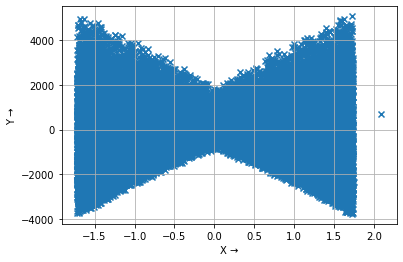

In [ ]:
plt.grid(True)
plt.scatter(X_train_norm[:, 1],Y_train, marker = "x")         # The plot is for feature A vs Y
plt.xlabel('X →')
plt.ylabel('Y →')
plt.show()

## Abstract Base Class : Layer

The abstract class Layer, which all other layers will inherit from, handles simple properties which are an input, an output, and both a forward and backward methods.

In [ ]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

## Fully Connected Layer

FC layers are the most basic layers as every input neurons are connected to every output neurons.

### Forward Propogation:

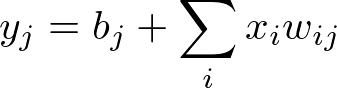

### Backward Propogation:

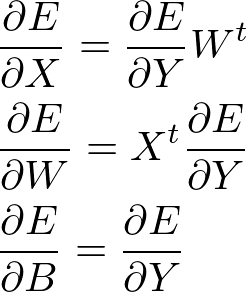

In [ ]:
# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

## Activation Layer

In [ ]:
# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [ ]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

## Loss Function

Mean-Squared Error is used as the Cost function.

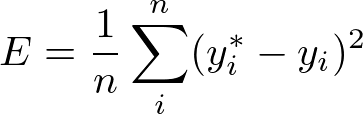

In [ ]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

## Network Class

In [ ]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

### Normalising the Data

In [ ]:
x_train, mu, sigma = normalise(X_train)
x_test = (X_test-mu)/sigma

## Creating the Neural Network

The neural network will have 2 Hidden layers with 10 and 5 neurons each, one Input layer and one Output layer.

In [ ]:
net = Network()
net.add(FCLayer(X_train.shape[1], 10))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(10, 5))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(5, 1))

## Fitting the Training Data

The output is normalised to prevent the overflowing error.

In [ ]:
y_train, mu_y, sigma_y = normalise(Y_train)
x_train = x_train.reshape(X_train.shape[0], 1, X_train.shape[1])
net.use(mse, mse_prime)
net.fit(x_train, y_train, epochs=50, learning_rate=0.1)

epoch 1/50   error=0.184021
epoch 2/50   error=0.008257
epoch 3/50   error=0.004485
epoch 4/50   error=0.003508
epoch 5/50   error=0.002798
epoch 6/50   error=0.002083
epoch 7/50   error=0.001568
epoch 8/50   error=0.000819
epoch 9/50   error=0.000706
epoch 10/50   error=0.000636
epoch 11/50   error=0.000585
epoch 12/50   error=0.000545
epoch 13/50   error=0.000512
epoch 14/50   error=0.000485
epoch 15/50   error=0.000462
epoch 16/50   error=0.000441
epoch 17/50   error=0.000423
epoch 18/50   error=0.000407
epoch 19/50   error=0.000392
epoch 20/50   error=0.000379
epoch 21/50   error=0.000366
epoch 22/50   error=0.000355
epoch 23/50   error=0.000344
epoch 24/50   error=0.000333
epoch 25/50   error=0.000324
epoch 26/50   error=0.000314
epoch 27/50   error=0.000305
epoch 28/50   error=0.000296
epoch 29/50   error=0.000288
epoch 30/50   error=0.000280
epoch 31/50   error=0.000272
epoch 32/50   error=0.000266
epoch 33/50   error=0.000259
epoch 34/50   error=0.000254
epoch 35/50   error=0.0

## Predicting the Testing Data

In [ ]:
out = net.predict(x_test)
out = np.array(out)
out = out.reshape(out.shape[0], 1)

De-normalising the output.

In [ ]:
out = (out*sigma_y) + mu_y

## Accuracy of the Neural Network Model

In [ ]:
from sklearn.metrics import r2_score

accuracy = r2_score(Y_test, out)
print(f"Testing accuracy of the model is {accuracy*100}%")

Testing accuracy of the model is 99.99442681696597%
